# Portfolio construction

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append('../')

In [4]:
import matplotlib.pyplot as mpl,seaborn as sns
import numpy as np
import pandas as pd
from scipy.linalg import block_diag
from sklearn.covariance import LedoitWolf 

In [5]:
from ml4am.datasets import build_block_matrix, build_true_matrix
from ml4am.datasets import simulate_covariance_mean

from ml4am.denoise_detone.CleanseMatrix import CleanseMatrix
from ml4am.denoise_detone.utils import covariance2correlation
from ml4am.denoise_detone.utils import compute_pca

from ml4am.optimal_clustering import OptimalClustering



In [6]:
from ml4am.portfolio_construction.nco import get_minimum_variance_portfolio_weights
from ml4am.portfolio_construction.nco import get_maximum_sharpe_portfolio_weights
from ml4am.portfolio_construction.nco import nco


## Motivation

## Convex portfolio optimization

##  The condition number 

## Signal as a Source of covariance instability

In [7]:
number_blocks, block_size, block_correlation = 2, 2, .5


In [8]:
true_correlation = build_block_matrix(number_blocks=number_blocks ,
                                       block_size = block_size,
                                       block_correlation = block_correlation)


In [9]:
true_correlation.shape

(4, 4)

In [10]:
eigenvalues, eigenvectors = np.linalg.eigh(true_correlation)

In [11]:
true_condition_number = max(eigenvalues)/min(eigenvalues)

In [12]:
print(f'True condition number: {true_condition_number}')

True condition number: 3.0


<AxesSubplot:>

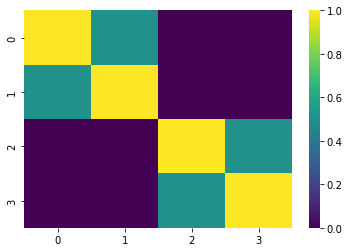

In [13]:
sns.heatmap(true_correlation,cmap='viridis')

In [14]:

true_correlation_1 = block_diag(build_block_matrix(number_blocks=1 ,
                                       block_size = 2,
                                       block_correlation = 0.5))



In [15]:
true_correlation_1

array([[1. , 0.5],
       [0.5, 1. ]])

In [16]:
true_correlation_2 = build_block_matrix(number_blocks=1 ,
                                       block_size = 2,
                                       block_correlation = 0)

In [17]:
true_correlation_2

array([[1., 0.],
       [0., 1.]])

In [18]:
true_correlation_1=block_diag(true_correlation_1,true_correlation_2)

In [19]:
true_correlation_1

array([[1. , 0.5, 0. , 0. ],
       [0.5, 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [20]:
eigenvalues_1, eigenvectors_1 = np.linalg.eigh(true_correlation_1)

In [21]:
true_condition_number_1 = max(eigenvalues_1)/min(eigenvalues_1)

In [22]:
true_condition_number_1

3.0

<AxesSubplot:>

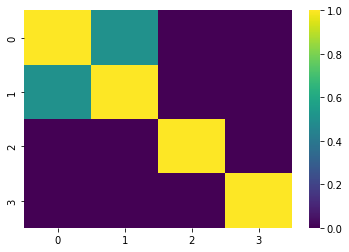

In [23]:
sns.heatmap(true_correlation_1,cmap='viridis')

## The nested clustered optimization algorithm

### Correlation clustering 

In [24]:
number_blocks, block_size, block_correlation = 10,50, 0.5

In [25]:

np.random.seed(0)
true_mu,true_covariance=build_true_matrix(number_blocks = number_blocks,
                                              block_size = block_size ,
                                              block_correlation = block_correlation)

In [26]:
true_covariance

,90,254,283,445,461,15,316,489,159,153,...,211,9,359,195,251,323,192,117,47,172
90,0.014156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
254,0.000000,0.003214,0.004818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.005307,0.000000,0.000000,0.00000,0.000000,0.000000
283,0.000000,0.004818,0.028890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.015912,0.000000,0.000000,0.00000,0.000000,0.000000
445,0.000000,0.000000,0.000000,0.003788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
461,0.000000,0.000000,0.000000,0.000000,0.016339,0.000000,0.000000,0.012394,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003921,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.003295,0.000000,0.00000,0.000000,0.000000
192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006896,0.002597,...,0.0,0.000000,0.0,0.005726,0.000000,0.000000,0.008823,0.00000,0.000000,0.003567
117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.02473,0.000000,0.000000
47,0.000000,0.000000,0.000000,0.000000,0.000000,0.005412,0.000000,0.000000,0.000000,0.000000,...,0.0,0.008207,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.012705,0.000000


<AxesSubplot:>

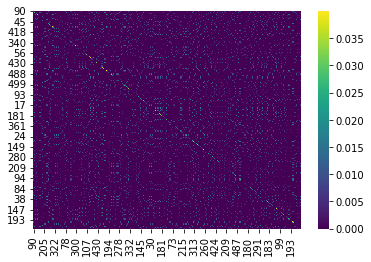

In [27]:
sns.heatmap(true_covariance,cmap='viridis')

In [28]:
eigenvalues, eigenvectors=compute_pca(true_covariance)

<AxesSubplot:>

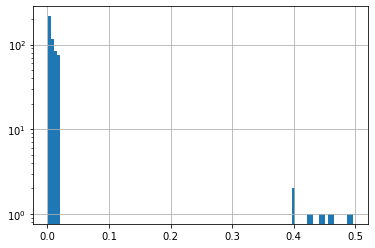

In [29]:
pd.Series(np.diag(eigenvalues)).hist(bins=100, log = True)

In [30]:
column_name = true_covariance.columns

In [31]:
covariance_matrix_cleanser = CleanseMatrix(  use_shrinkage = False,
                                             shrinkage_regularizer = 0.01,
                                             detone = False,
                                             market_components_max_index =1,
                                             grid_size = 100,
                                             kernel = 'gaussian',
                                             cv = 2,
                                             min_bandwidth_grid_exponent = -3,
                                             max_bandwidth_grid_exponent  = 1,
                                             bandwidth_grid_size = 250,
                                             initial_variance  = 0.5,
                                             epsilon = 1e-5,
                                             min_q = 10,
                                             max_q = 10,
                                             q_grid_size = 1,
                                             verbose = True)

In [32]:
covariance_matrix_cleanser.fit(true_covariance)

For q=10.0, the optimal variance is 1.0 , and objective function is 69.0,and max random eigen value: 1.73,and # of signal factors: 0
(500, 500)
[[ 1.73160917e-02 -5.74778649e-19 -9.96506188e-19 ...  1.62727192e-20
   5.04407493e-20 -2.87343923e-20]
 [-5.74778649e-19  1.73160917e-02 -9.48676901e-19 ...  4.40264026e-19
   9.15606807e-19  5.87271997e-19]
 [-9.96506188e-19 -9.08019319e-19  1.73160917e-02 ...  3.57960997e-18
  -3.90574944e-19 -9.29572473e-19]
 ...
 [ 1.62727192e-20  4.40264026e-19  3.57960997e-18 ...  1.73160917e-02
   1.39027030e-18 -1.82330137e-18]
 [ 5.04407493e-20  9.15606807e-19 -3.90574944e-19 ...  1.39027030e-18
   1.73160917e-02  1.12591491e-19]
 [-2.87343923e-20  5.87271997e-19 -9.29572473e-19 ... -1.82330137e-18
   1.12591491e-19  1.73160917e-02]]
[[ 1.73160917e-02 -5.74778649e-19 -9.96506188e-19 ...  1.62727192e-20
   5.04407493e-20 -2.87343923e-20]
 [-5.74778649e-19  1.73160917e-02 -9.48676901e-19 ...  4.40264026e-19
   9.15606807e-19  5.87271997e-19]
 [-9.96506

<AxesSubplot:>

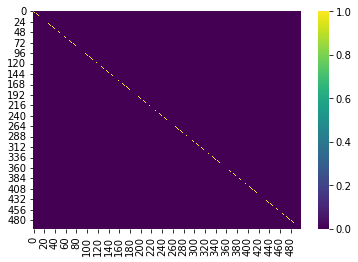

In [33]:
sns.heatmap(covariance_matrix_cleanser.cleansed_matrix,cmap='viridis')

In [34]:
covariance_matrix_cleanser.estimated_number_signal_factors

0

In [35]:
true_covariance_cleansed=pd.DataFrame(covariance_matrix_cleanser.cleansed_matrix,index=column_name,columns=column_name)

In [36]:
true_correlation_cleansed = covariance2correlation(true_covariance_cleansed)

In [37]:
true_correlation_cleansed.shape

(500, 500)

In [38]:
optimal_clustering_model = OptimalClustering(n_jobs=8, 
                                             is_input_correlation = False,
                                             max_number_clusters=20)
optimal_clustering_model.fit(true_covariance)

Clustering using the Silhouette method


In [39]:
optimal_clustering_model.n_clusters

10

In [40]:
optimal_clustering_model.reordered_X

,255,295,256,292,293,274,297,273,287,265,...,32,30,17,2,18,14,20,22,29,33
255,0.029602,0.017081,0.015636,0.006355,0.013329,0.013920,0.016434,0.007094,0.006209,0.008025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
295,0.017081,0.039423,0.018044,0.007334,0.015381,0.016064,0.018965,0.008187,0.007165,0.009261,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
256,0.015636,0.018044,0.033035,0.006713,0.014080,0.014705,0.017361,0.007495,0.006559,0.008478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
292,0.006355,0.007334,0.006713,0.005457,0.005723,0.005977,0.007056,0.003046,0.002666,0.003446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
293,0.013329,0.015381,0.014080,0.005723,0.024005,0.012535,0.014799,0.006389,0.005591,0.007227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003504,0.010441,0.007602,0.004459,0.002670,0.011227,0.006669,0.005841,0.006445,0.009785
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004163,0.012405,0.009032,0.005297,0.003173,0.006669,0.015846,0.006940,0.007656,0.011626
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003646,0.010865,0.007911,0.004640,0.002779,0.005841,0.006940,0.012157,0.006706,0.010183
29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004023,0.011988,0.008728,0.005119,0.003066,0.006445,0.007656,0.006706,0.014798,0.011235


<AxesSubplot:>

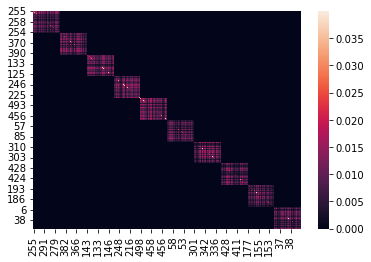

In [41]:

sns.heatmap(optimal_clustering_model.reordered_X)#,cmap='viridis')

### Intracluster weights

The second step of the NCO algorithm is to compute optimal intracluster allocations, using the denoised covariance matrix, `true_covariance_cleansed`. 

The code in this section implements this procedure. 

For simplicity purposes, we have defaulted to a minimum variance allocation, as implemented in the `get_minimum_variance_portfolio_weights` function. 

However, nothing in the procedure prevents the use of alternative allocation methods. 

Using the estimated intracluster weights, we can derive the reduced covariance matrix, `reduced_covariance_matrix`, which reports the correlations between clusters.

In [42]:
optimal_clustering_model.clusters.keys()
    
    
    

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
intracluster_weights =pd.DataFrame(0,index=true_covariance_cleansed.index,columns=optimal_clustering_model.clusters.keys())

In [44]:
for i in optimal_clustering_model.clusters:
    _cov_matrix = true_correlation_cleansed.loc[optimal_clustering_model.clusters[i], optimal_clustering_model.clusters[i]] 
    _pt_weights = get_minimum_variance_portfolio_weights(_cov_matrix)
    intracluster_weights.loc[optimal_clustering_model.clusters[i],i]=_pt_weights

In [45]:
intracluster_weights

,0,1,2,3,4,5,6,7,8,9
90,0.00,0.0,0.00,0.0,0.00,0.02,0.00,0.00,0.00,0.00
254,0.02,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
283,0.02,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
445,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.02,0.00,0.00
461,0.00,0.0,0.00,0.0,0.02,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
323,0.00,0.0,0.00,0.0,0.00,0.00,0.02,0.00,0.00,0.00
192,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.00
117,0.00,0.0,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.00
47,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.02


In [46]:
# reduced covariance matrix, reports the correlation between clusters 
reduced_covariance_matrix=intracluster_weights.T.dot(np.dot(true_covariance_cleansed,intracluster_weights)) 

In [47]:
reduced_covariance_matrix

,0,1,2,3,4,5,6,7,8,9
0,2.000000e-02,-1.899978e-19,-5.604190e-20,-2.324378e-19,-2.951393e-19,-8.068955e-20,1.773943e-19,-2.063101e-21,1.202547e-19,-6.857388e-20
1,-1.899978e-19,2.000000e-02,-1.150627e-19,-5.023776e-19,-2.583436e-19,7.077504e-19,-1.761606e-19,1.046134e-18,-4.569654e-19,4.965264e-19
2,-5.604190e-20,-1.150627e-19,2.000000e-02,-6.696878e-20,5.627546e-19,3.162886e-19,-3.698152e-19,2.486717e-19,-2.189810e-19,3.825209e-19
3,-2.324378e-19,-5.023776e-19,-6.696878e-20,2.000000e-02,2.498491e-19,-3.448581e-19,2.894325e-19,4.685200e-19,3.744889e-18,-6.088056e-19
4,-2.951393e-19,-2.583436e-19,5.627546e-19,2.498491e-19,2.000000e-02,-7.198690e-19,-3.185149e-20,4.411246e-18,-6.588306e-21,9.974033e-20
5,-8.068955e-20,7.077504e-19,3.162886e-19,-3.448581e-19,-7.198690e-19,2.000000e-02,1.616599e-19,4.712206e-19,-1.665672e-19,6.387498e-20
6,1.773943e-19,-1.761606e-19,-3.698152e-19,2.894325e-19,-3.185149e-20,1.616599e-19,2.000000e-02,3.967385e-20,-1.413242e-21,-1.162392e-17
7,-2.063101e-21,1.046134e-18,2.486717e-19,4.685200e-19,4.411246e-18,4.712206e-19,3.967385e-20,2.000000e-02,6.883466e-19,-2.145518e-19
8,1.202547e-19,-4.569654e-19,-2.189810e-19,3.744889e-18,-6.588306e-21,-1.665672e-19,-1.413242e-21,6.883466e-19,2.000000e-02,1.336613e-19
9,-6.857388e-20,4.965264e-19,3.825209e-19,-6.088056e-19,9.974033e-20,6.387498e-20,-1.162392e-17,-2.145518e-19,1.336613e-19,2.000000e-02


### Intercluster Weights


The third step of the NCO algorithm is to compute optimal intercluster allocations, using the reduced covariance matrix, `reduced_covariance_matrix`. 

By construction, this covariance matrix is close to a diagonal matrix, and the optimization problem is close to the ideal Markowitz case. 

In other words, the clustering and intracluster optimization steps have allowed us to transform a "Markowitz-cursed" problem ($\mid\rho \mid >> 0 $) into a well-behaved problem ($\rho \approx 0$).

The code in the below implements this procedure. 

It applies the same allocation procedure that was used in the intracluster allocation step (that is, the `get_minimum_variance_portfolio_weights` function). 

The final allocation per security is reported by the wAll0 data frame, which results from multiplying intracluster weights with the intercluster weights.

In [48]:

intercluster_weights=pd.Series(get_minimum_variance_portfolio_weights(reduced_covariance_matrix).flatten(),
                         index=reduced_covariance_matrix.index) 

final_portfolio_weights=intracluster_weights.mul(intercluster_weights,axis=1).sum(axis=1).sort_index()

In [49]:
final_portfolio_weights.shape

(500,)

In [50]:
final_portfolio_weights.describe()

count    5.000000e+02
mean     2.000000e-03
std      3.259335e-18
min      2.000000e-03
25%      2.000000e-03
50%      2.000000e-03
75%      2.000000e-03
max      2.000000e-03
dtype: float64

### NCO Algorithm

- Let $\Sigma$ be the covariance matrix $\in \mathbb{R}^{N\times N}$.
- Let $\mu$ be the expected returns vector $\in \mathbb{R}^{N\times 1}$.
- Using a clustering algorithm, we group the $N$ securities into $M$ clusters
    - for each cluster $1 \leq m \leq M $, 
        - $\mu_m$: expected returns of the securities in the cluster 
        - $\Sigma_m$: the sub-covariance matrix corresponding to the securities in the cluster
- Let $\tilde{W}$ the intra-clusters weight matrix: 
    - For each cluster, we run mean-variance optimization on $(\mu_m, \Sigma_m)$ to estimate the optimal weights $w_m \in \mathbb{R}^{N\times 1}$ where securities outside the cluster $m$ have zero weight 
     $$\tilde{W} = [w_1, w_2, \cdots, w_M ] \in \mathbb{R}^{N\times M}$$

- Compute the reduced moments:
    - expected returns:
        $$ \tilde{\mu} = \tilde{W}^T   \mu \in \mathbb{R}^{M\times 1} $$
    - covariance matrix:
        $$ \tilde{\Sigma} = \tilde{W}^T  \Sigma \tilde{W} \in \mathbb{R}^{M\times M} $$
- Use   mean-variance optimization on $(\tilde{\mu},  \tilde{\Sigma} )$  to produce cluster level weights:
    $$w_c \in \mathbb{R}^{M\times 1}$$
- The final security level optimal weights are computed as:
    $$ w^{*} =  \tilde{W}w_c \in  \mathbb{R}^{N\times 1}$$

## Experimental results 

In this section we subject the NCO algorithm to controlled experiments, and compare its performance to Markowitz’s approach. 

Like in the Denoising-Detoning chapter, we discuss two characteristic portfolios of the efficient frontier, namely:
- the minimum variance and 
- maximum Sharpe ratio solutions, 
since any member of the unconstrained efficient frontier can be derived as a convex combination of the two (a result sometimes known as the "separation theorem").

Code Snippet 7.6 implements the NCO algorithm introduced earlier in this section. 



### Minimum variance portfolio 

We create:
- a random vector of means and 
- a random covariance matrix 
that represent a stylized version of a fifty securities portfolio, grouped in ten blocks with intracluster correlations of 0.5. 

This vector and matrix characterize the "true" process that generates observations.

We set a seed for the purpose of reproducing and comparing results across runs with different parameters. 



In [52]:
number_blocks, block_size, block_correlation = 10,50, 0.5
np.random.seed(0)
true_mu,true_covariance=build_true_matrix(number_blocks = number_blocks,
                                              block_size = block_size ,
                                              block_correlation = block_correlation)


In [53]:
true_covariance.reset_index(drop=True, inplace=True)
true_covariance.columns = sorted(true_covariance.columns.tolist())

<AxesSubplot:>

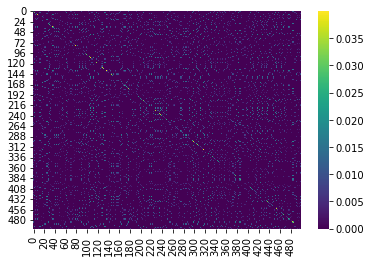

In [54]:
sns.heatmap(true_covariance,cmap='viridis')

Then we simulate a random empirical vector of means and a random empirical covariance matrix based on 1,000 observations drawn from the true process. 

Using that empirical covariance matrix,
-  we can estimate the minimum variance portfolio according to Markowitz, and 
-  estimate the minimum variance portfo- lio applying the NCO algorithm. 

This procedure is repeated on 1,000 different random empirical covariance matrices. 

In [64]:
number_observations, number_simulations , shrink, min_variance_portfolio=1000,2,False, True
np.random.seed(0)
markowitz_weights=pd.DataFrame(columns=range(true_covariance.shape[0]),
                                index=range(number_simulations),dtype=float) 
nco_weights=markowitz_weights.copy(deep=True)

for i in range(number_simulations):
    
    sample_mu, sample_covariance =simulate_covariance_mean(true_mu=true_mu,
                                                             true_covariance = true_covariance ,
                                                             number_of_observations = number_observations,
                                                             shrink =shrink  )
    markowitz_weights.loc[i] = get_minimum_variance_portfolio_weights(sample_covariance).flatten()
    nco_weights.loc[i] = nco(covariance = sample_covariance,
                            mu = None,
                            max_number_clusters= 10,
                            n_jobs=20)#int(sample_covariance.shape[0]/5))#.flatten()  
    


In [72]:
# Compute the true allocation
true_w=get_minimum_variance_portfolio_weights(true_covariance) 

In [73]:

true_w=np.repeat(true_w.T,markowitz_weights.shape[0],axis=0)

In [74]:
true_w.shape

(2, 500)

In [75]:
markowitz_weights.shape

(2, 500)

In [76]:
nco_weights.shape

(2, 500)

In [77]:
np.mean(((true_w - markowitz_weights).values.flatten()**2)**.5)

0.00356066028190836

In [78]:
np.mean(((true_w - nco_weights).values.flatten()**2)**.5)

0.0008943276356975214

### Maximum Sharpe Ratio Portfolio 

In [80]:
 
maxsharpe_markowitz_weights=pd.DataFrame(columns=range(true_covariance.shape[0]),
                                index=range(number_simulations),dtype=float) 
maxsharpe_nco_weights=markowitz_weights.copy(deep=True)

for i in range(number_simulations):
    
    sample_mu, sample_covariance =simulate_covariance_mean(true_mu=true_mu,
                                                             true_covariance = true_covariance ,
                                                             number_of_observations = number_observations,
                                                             shrink =shrink  )
    maxsharpe_markowitz_weights.loc[i] = get_maximum_sharpe_portfolio_weights(sample_covariance, sample_mu).flatten()
    maxsharpe_nco_weights.loc[i] = nco(covariance = sample_covariance,
                            mu = sample_mu,
                            max_number_clusters= 10,
                            n_jobs=20)#int(sample_covariance.shape[0]/5))#.flatten()  
    


Clustering using the Silhouette method
Optimal number of clusters identified : 10
Clustering using the Silhouette method
Optimal number of clusters identified : 10


In [84]:
# Compute the true allocation
maxsharpe_true_w=get_maximum_sharpe_portfolio_weights(true_covariance, true_mu) 

In [85]:
maxsharpe_true_w=np.repeat(maxsharpe_true_w.T,maxsharpe_markowitz_weights.shape[0],axis=0)

In [86]:
np.mean(((maxsharpe_true_w - maxsharpe_markowitz_weights).values.flatten()**2)**.5)

0.778873681167682

In [87]:
np.mean(((maxsharpe_true_w - maxsharpe_nco_weights).values.flatten()**2)**.5)

0.02865685601685357